In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 99% 326M/329M [00:10<00:00, 39.6MB/s]
100% 329M/329M [00:10<00:00, 32.5MB/s]


In [3]:
import zipfile
zip=zipfile.ZipFile("plant-village.zip")
zip.extractall()
zip.close()

In [4]:
root_dir = os.listdir("/content/PlantVillage")
print(root_dir)

['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Pepper__bell___Bacterial_spot', 'Tomato_Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Potato___Early_blight', 'Potato___healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite']


In [5]:
import glob
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split

In [6]:
image_size=(256,256)
batch_size=32
channels=3
epochos=50

In [7]:
root_dataset =  image_dataset_from_directory(
    "/content/PlantVillage",
)

Found 20638 files belonging to 15 classes.


In [8]:
test_leaf,train_leaf=train_test_split(root_dir,test_size=0.8,random_state=42)

In [9]:
print(len(test_leaf))
print(len(train_leaf))

3
12


In [10]:
os.mkdir("/content/test_leaf")
os.mkdir("/content/train_leaf")

In [11]:
for img in test_leaf:
  os.mkdir(os.path.join("/content/test_leaf",img))
  for i in os.listdir(os.path.join("/content/PlantVillage",img)):
    os.rename(os.path.join("/content/PlantVillage",img,i),os.path.join("/content/test_leaf",img,i))

In [12]:
for img in train_leaf:
  os.mkdir(os.path.join("/content/train_leaf",img))
  for i in os.listdir(os.path.join("/content/PlantVillage",img)):
    os.rename(os.path.join("/content/PlantVillage",img,i),os.path.join("/content/train_leaf",img,i))

In [17]:
dataset = image_dataset_from_directory(
    "/content/train_leaf",
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb",
    label_mode="categorical",
    seed=42,
    validation_split=0.2,
    subset="training",
)

Found 17237 files belonging to 12 classes.
Using 13790 files for training.


In [18]:
import tensorflow_datasets as tfds
label_names=root_dataset.class_names
print(label_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


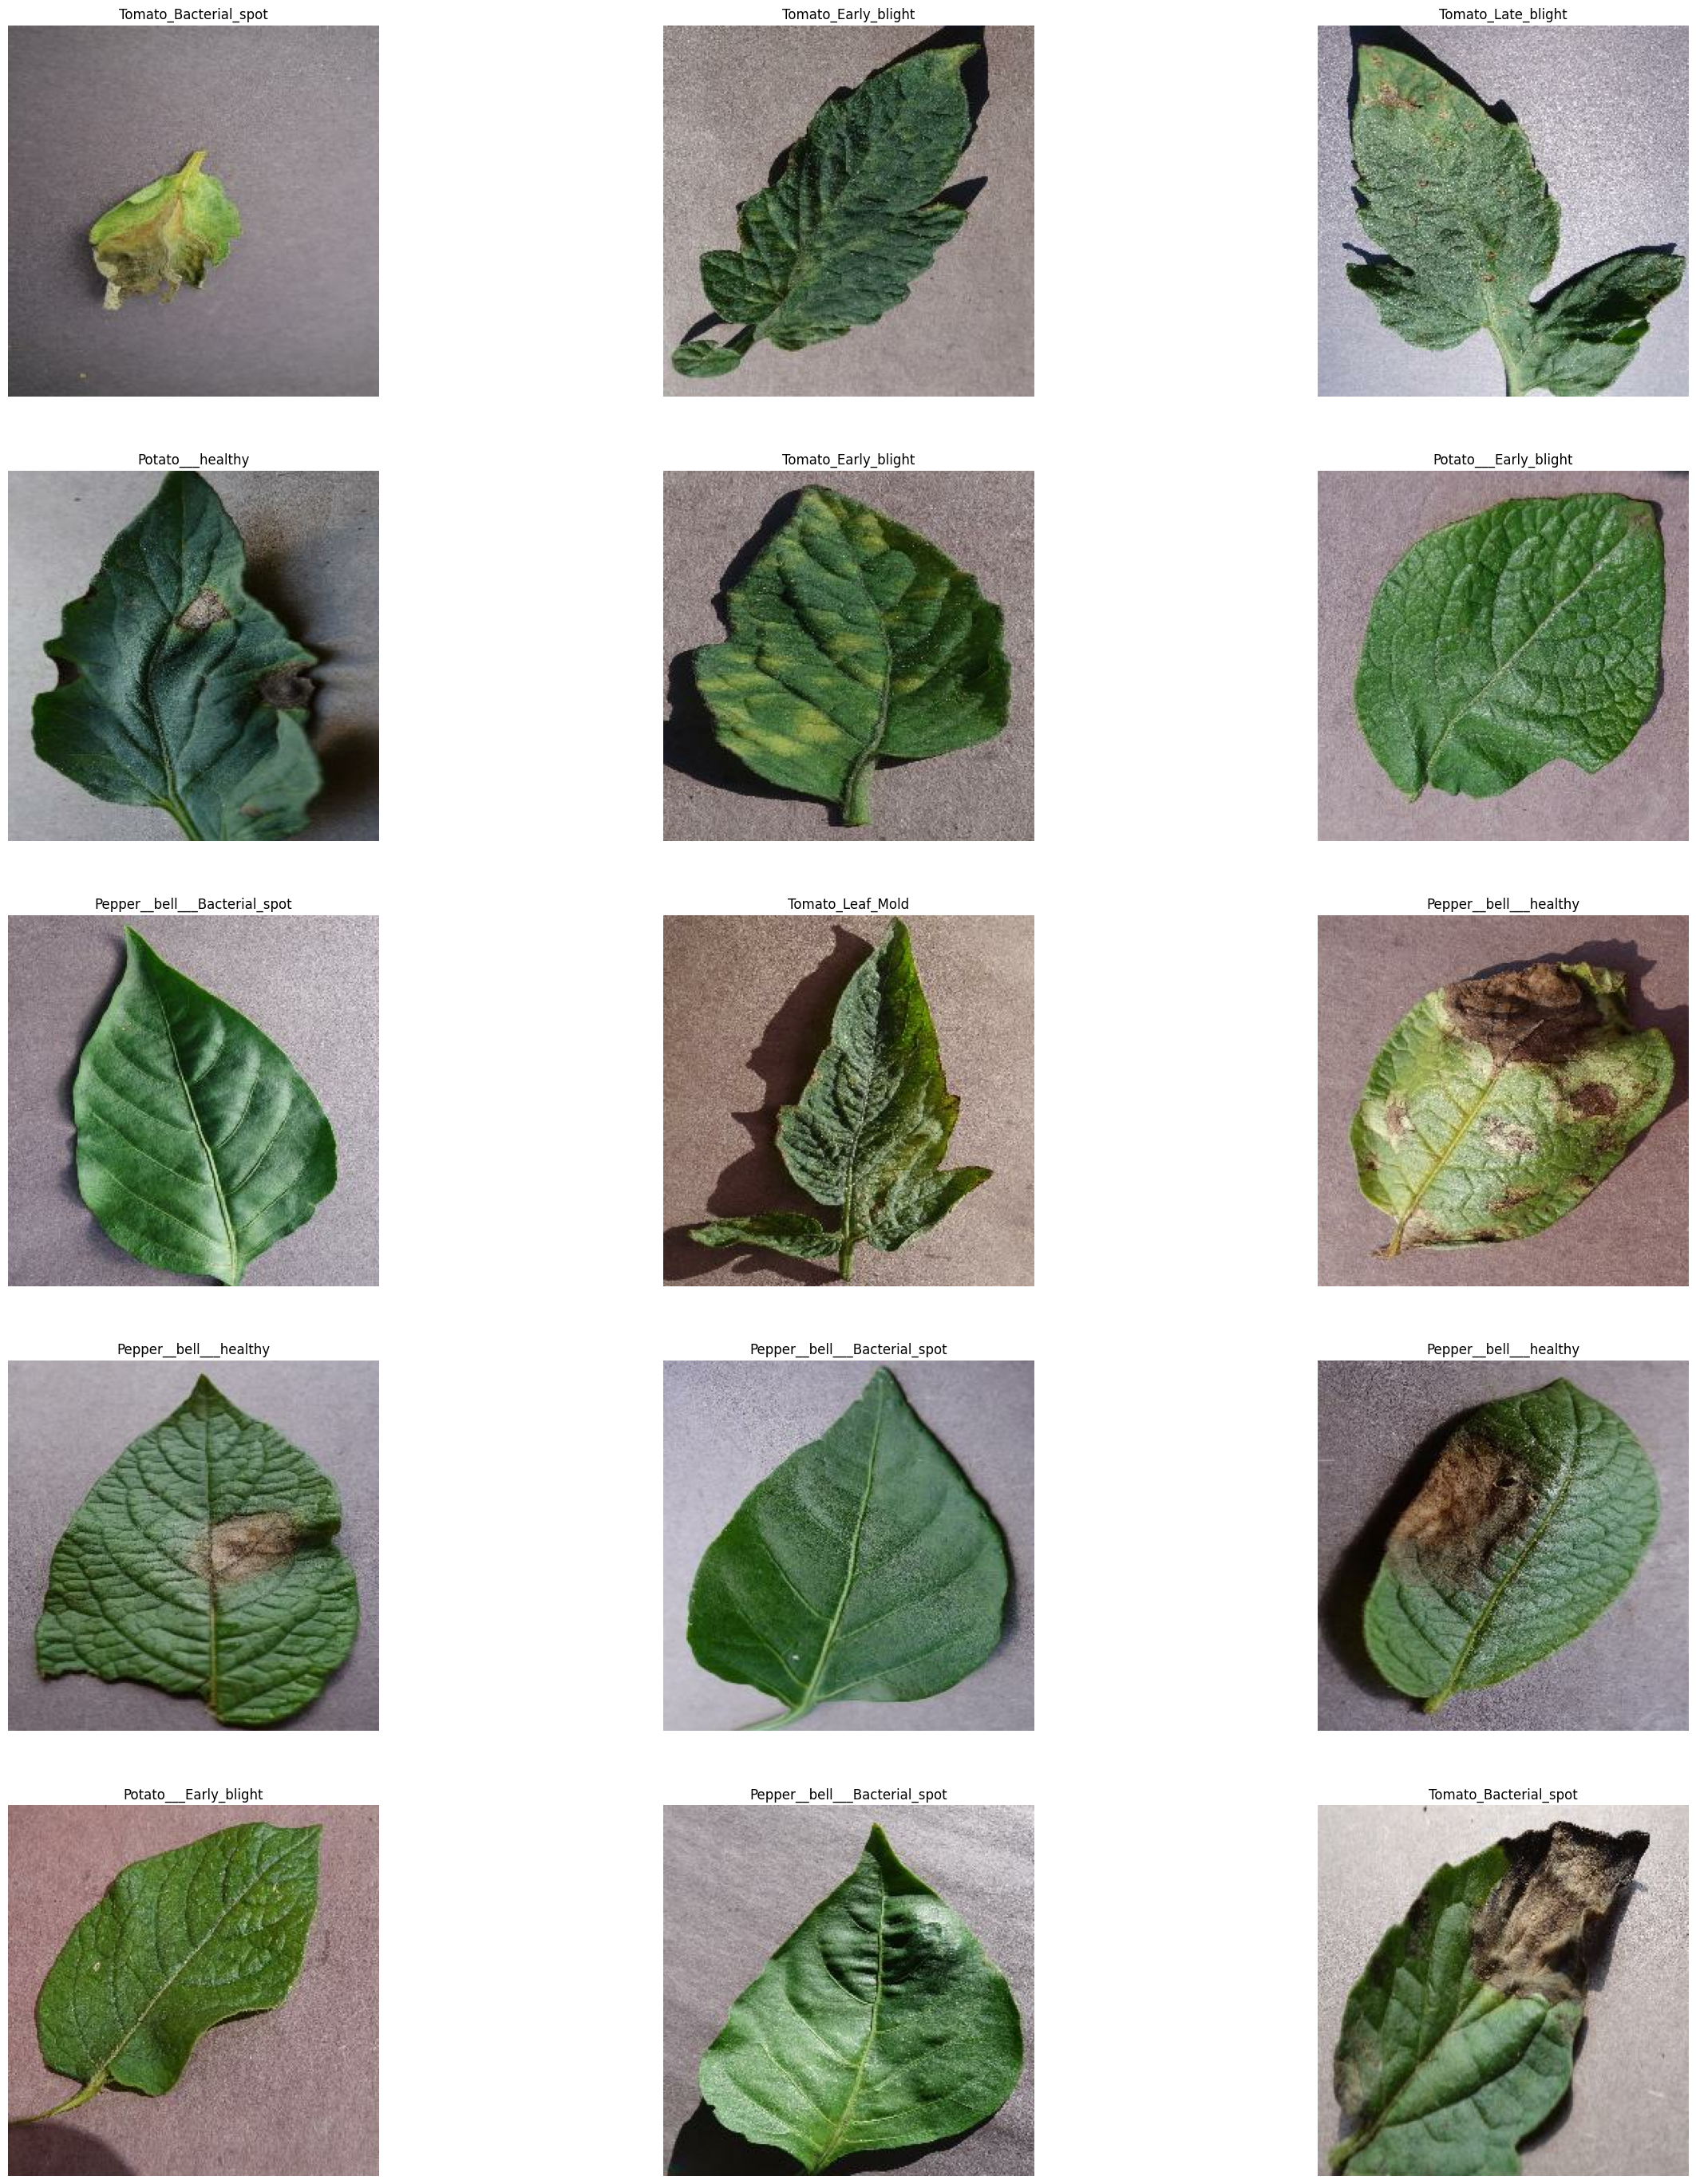

In [19]:
plt.figure(figsize=(30,35))
for images,image_label in dataset.take(1):
  for i in range(15):
    ax=plt.subplot(5,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    pred_label=tf.argmax(image_label[i]).numpy()
    plt.title(label_names[pred_label])
    plt.axis("off")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
)

In [22]:
train_data= train_data_gen.flow_from_directory(
    "/content/train_leaf",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 17237 images belonging to 12 classes.


In [23]:
test_data=test_data_gen.flow_from_directory(
    "/content/test_leaf",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 3401 images belonging to 3 classes.


In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam,RMSprop
from keras.activations import relu,softmax
from keras.losses import categorical_crossentropy
import pandas as pd

In [25]:
model=keras.Sequential([
    layers.InputLayer(input_shape=(256,256,3)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dense(128,activation="relu"),
    layers.Flatten(),
    layers.Dense(12,activation="softmax"),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [27]:
model.build()
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14, 14, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │         301,068 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 448,140 (1.71 MB)

 Trainable params: 447,948 (1.71 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
graph = model.fit(train_data,epochs=50)
plt.plot(pd.DataFrame(graph.history))
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


539/539 ━━━━━━━━━━━━━━━━━━━━ 294s 515ms/step - accuracy: 0.5542 - loss: 1.5506
Epoch 2/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 302s 498ms/step - accuracy: 0.7660 - loss: 0.7193
Epoch 3/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 319s 491ms/step - accuracy: 0.8297 - loss: 0.5291
Epoch 4/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 268s 489ms/step - accuracy: 0.8620 - loss: 0.4069
Epoch 5/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 271s 495ms/step - accuracy: 0.8929 - loss: 0.3369
Epoch 6/50


In [ ]:
ef=[]

In [ ]:
for i in root_dir:
  r=os.path.join("/content/PlantVillage/",i)
  for i in os.listdir(r):
    r=os.path.join(r,i)
    ef.append(r)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
img= Image.open(ef[0])
img

In [ ]:
for i in ef:
  img=os.listdir(i)
  print(img)

In [ ]:
len(ef)

In [ ]:
for i in range(10):
  img=Image.open(ef[i])
  img.show()

In [ ]:
im=Image.open("/content/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG")
im

In [ ]:
im

In [ ]:
len(os.listdir("/content/PlantVillage/Pepper__bell___Bacterial_spot"))

In [ ]:
"/content/PlantVillage/Pepper__bell___Bacterial_spot"